In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


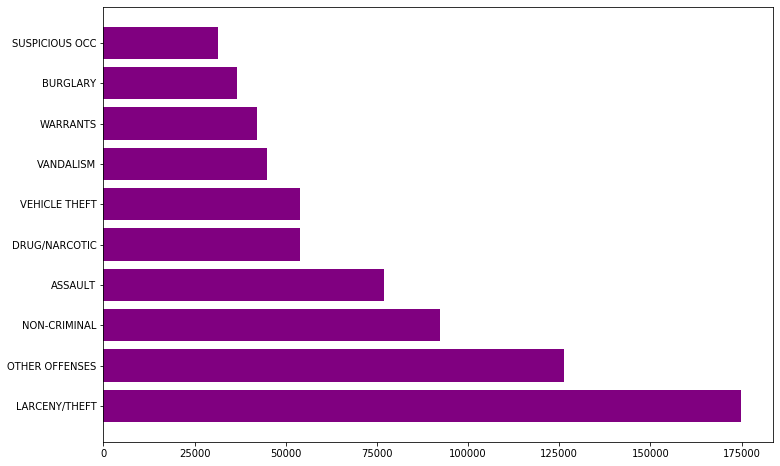

In [3]:
top_crimes = train_data.Category.value_counts()[:10]
plt.figure(figsize=(12,8))
pos = np.arange(len(top_crimes))
plt.barh(pos,top_crimes.values,color='purple');
plt.yticks(pos,top_crimes.index);

In [4]:
top_crimes

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
VEHICLE THEFT      53781
VANDALISM          44725
WARRANTS           42214
BURGLARY           36755
SUSPICIOUS OCC     31414
Name: Category, dtype: int64

In [5]:
top_crimes.describe()

count        10.000000
mean      73312.200000
std       46092.238286
min       31414.000000
25%       42841.750000
50%       53876.000000
75%       88447.000000
max      174900.000000
Name: Category, dtype: float64

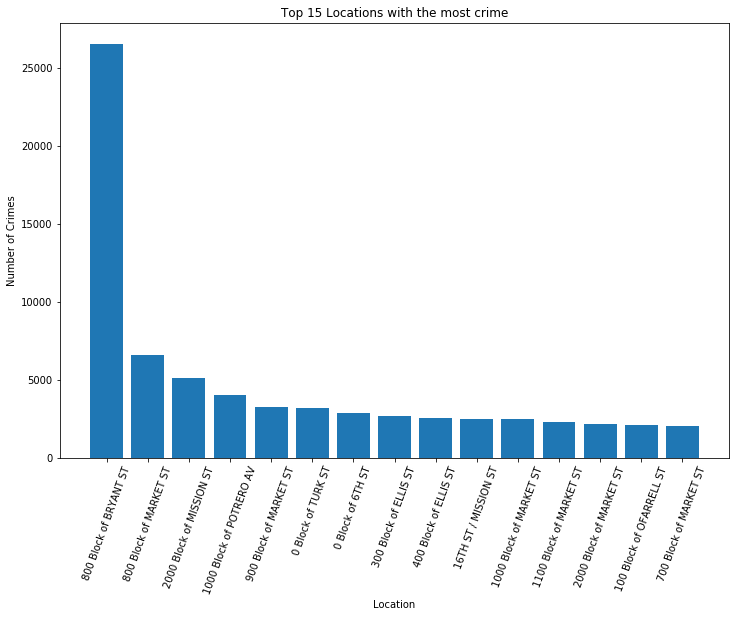

In [6]:
top_addresses = train_data.Address.value_counts()[:15]
plt.figure(figsize=(12,8))
pos = np.arange(len(top_addresses))
plt.bar(pos,top_addresses.values)
plt.xticks(pos,top_addresses.index,rotation=70)
plt.title('Top 15 Locations with the most crime')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.show()

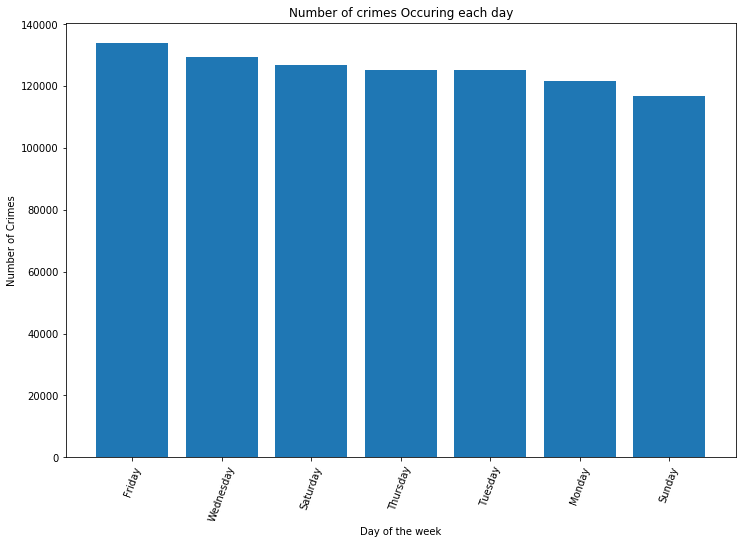

In [7]:
top_days = train_data.DayOfWeek.value_counts()
plt.figure(figsize=(12,8))

pos = np.arange(len(top_days))
plt.bar(pos,top_days.values)
plt.xticks(pos,top_days.index,rotation=70)
plt.title('Number of crimes Occuring each day')
plt.xlabel('Day of the week')
plt.ylabel('Number of Crimes')
plt.show()

In [8]:
train_data['Hour'] = train_data['Dates'].apply(lambda x:int(x.split(' ')[1].split(':')[0]))
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,23


In [9]:
hours = train_data.groupby('Hour').size()
hours

Hour
0     44865
1     26173
2     22296
3     14014
4      9863
5      8637
6     13133
7     22048
8     32900
9     35555
10    37806
11    38373
12    51934
13    43145
14    44424
15    48058
16    50137
17    53553
18    55104
19    49475
20    44694
21    43661
22    45741
23    42460
dtype: int64

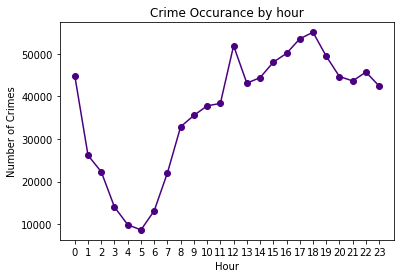

In [10]:
plt.plot(hours.values,'ro-',color='indigo')
plt.xticks(hours.index)
plt.title('Crime Occurance by hour')
plt.ylabel('Number of Crimes')
plt.xlabel('Hour')
plt.show()

In [11]:
test_data = pd.read_csv('test.csv')

In [12]:
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [13]:
for dataset in [train_data,test_data]:
    dataset['Year'] = dataset['Dates'].apply(lambda x:int(x.split('-')[0]))
    dataset['Month'] = dataset['Dates'].apply(lambda x:int(x.split('-')[1]))
    dataset['Date'] = dataset['Dates'].apply(lambda x:int(x.split('-')[2].split(' ')[0]))
    dataset['Hour'] = dataset['Dates'].apply(lambda x:int(x.split('-')[1].split(':')[0]))
    dataset['Minute'] = dataset['Dates'].apply(lambda x:int(x.split(' ')[1].split(':')[1]))

In [16]:
threat_to_individuals = ['ARSON', 'ASSAULT', 'EXTORTION', 'KIDNAPPING', 'LARCENY/THEFT', 'BURGLARY', 'MISSING PERSON', 'ROBBERY', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'VANDALISM', 'VEHICLE THEFT', 'WEAPON LAWS', 'FAMILY OFFENSES', 'OTHER OFFENSES']
violation_of_law = ['BAD CHECKS', 'BRIBERY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'LIQUOR LAWS', 'LOITERING', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'RUNAWAY', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'TRESPASS', 'WARRANTS']

train_data['Category'] = train_data['Category'].apply(lambda x: 'THREAT TO OTHERS LIFE' if x in threat_to_individuals else ('VIOLATION OF LAW' if x in violation_of_law  else 'NON-CRIMINAL'))



In [17]:
train_data = train_data.fillna(train_data.mode().iloc[0])
test_data = test_data.fillna(test_data.mode().iloc[0])

In [18]:
features = ['Year','Month','Date','Hour','Minute','DayOfWeek','PdDistrict','X','Y']
non_numeric_features = ['DayOfWeek','PdDistrict']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder(sparse = False)

In [23]:
for feature in non_numeric_features:
    labelEncodedData = le.fit_transform(list(train_data[feature])+ list(test_data[feature]))
    oneHotEncoderData = labelEncodedData.reshape(len(labelEncodedData),1)
    ohe.fit(oneHotEncoderData)
    train_data = train_data.combine_first(pd.DataFrame(ohe.transform(le.transform(train_data[feature]).reshape(len(train_data[feature]),1))))
    test_data = test_data.combine_first(pd.DataFrame(ohe.transform(le.transform(test_data[feature]).reshape(len(test_data[feature]),1))))

C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In cas

In [24]:
features = ['Year','Month','Date','Hour','Minute','X','Y','0','1','2','3','4','5','6','7','8','9']
train_data.columns = ['Dates','Category','Descript','DayOfWeek','PdDistrict','Resolution','Address','X','Y','Year',
                      'Month','Date','Hour','Minute','0','1','2','3','4','5','6','7','8','9']
print(train_data.columns.values)
train_data.head()

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'X' 'Y' 'Year' 'Month' 'Date' 'Hour' 'Minute' '0' '1' '2' '3'
 '4' '5' '6' '7' '8' '9']


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,...,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Wednesday,WARRANT ARREST,5,53,5,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2015
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Wednesday,TRAFFIC VIOLATION ARREST,5,53,5,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2015
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Wednesday,TRAFFIC VIOLATION ARREST,5,33,5,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414,2015
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Wednesday,GRAND THEFT FROM LOCKED AUTO,5,30,5,NORTHERN,NONE,-122.426995,37.800873,2015
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,Wednesday,GRAND THEFT FROM LOCKED AUTO,5,30,5,PARK,NONE,-122.438738,37.771541,2015


In [25]:
from sklearn.model_selection import train_test_split
train_set, valid_set, train_labels,valid_labels = train_test_split(train_data[list(features)],train_data['Category'],test_size=0.4,random_state=4327)


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier

In [28]:
classifiers = [
        RandomForestClassifier(max_depth=16,n_estimators=1024),
        GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=5, random_state=0),
        KNeighborsClassifier(n_neighbors=100, weights='uniform', algorithm='auto', leaf_size=100, p=10, metric='minkowski'),
        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8), algorithm="SAMME.R", n_estimators=128)
    ]


In [30]:
for classifier in classifiers:
    # Train
    classifier.fit(train_set, train_labels)

    # Test results
    print(classifier.__class__.__name__)
    print('Accuracy Score:')
    print(accuracy_score(valid_labels,classifier.predict(valid_set)))

ValueError: could not convert string to float: 'FILLMORE ST / CALIFORNIA ST'

In [32]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(train_set,train_labels)
print(accuracy_score(valid_labels,xgb_classifier.predict(valid_labels)))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Month, Date, Minute, 0, 1, 5, 6